# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Alfito Putra Fajar Pratama  
- Email: alfitoputra567@gmail.com
- Id Dicoding: alfitoptr

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

import joblib


# Setting style
sns.set_style("darkgrid")

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
pd.set_option('display.max_colwidth', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application_mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application_order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_evening_attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous_qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous_qualification_grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mothers_qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Fathers_qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


In [6]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

## Data Preparation / Preprocessing

### Label Encoding

In [7]:
df['Target'] = df['Status'].map({'Dropout' : 1, 'Enrolled': 0, 'Graduate': 0})

In [8]:
df['Target']

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: Target, Length: 4424, dtype: int64

### Split Data

In [ ]:
X = df.drop(columns=['Status', 'Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [ ]:
with open('columns.txt', 'w') as file:
    for column in X.columns:
        file.write(column + '\n')

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Oversampling and Undersampling

In [ ]:
smt = SMOTE(random_state=42)
cc = ClusterCentroids(random_state=42)

In [ ]:
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

In [ ]:
y_train.value_counts(), y_smt.value_counts()

(Target
 0    2434
 1    1105
 Name: count, dtype: int64,
 Target
 1    2434
 0    2434
 Name: count, dtype: int64)

In [ ]:
X_cc, y_cc = cc.fit_resample(X_train, y_train)
X_cc = scaler.fit_transform(X_cc)

In [49]:
y_train.value_counts(), y_cc.value_counts()

(Target
 0    2434
 1    1105
 Name: count, dtype: int64,
 Target
 0    1105
 1    1105
 Name: count, dtype: int64)

## EDA

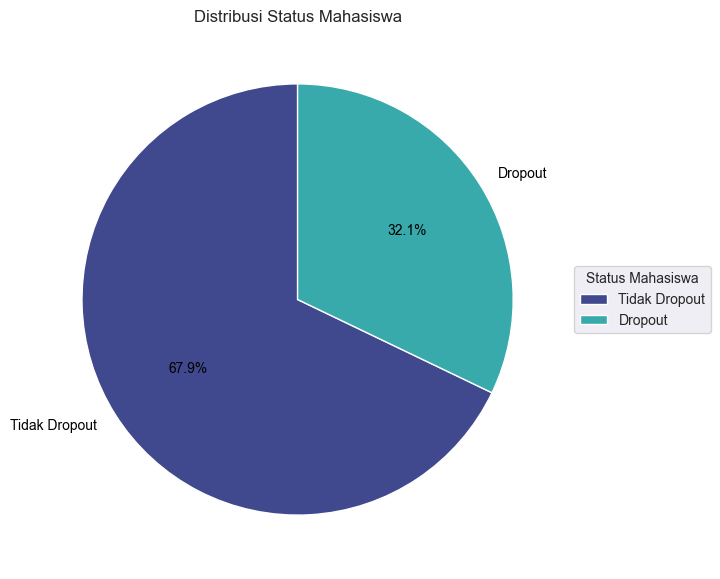

In [57]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("mako", 2)
wedges, texts, autotexts = ax.pie(
    df['Target'].value_counts(),
    labels=['Tidak Dropout', 'Dropout'],
    startangle=90,
    autopct='%1.1f%%',
    colors=colors,
    textprops=dict(color="black")
)

ax.legend(
    wedges,
    ['Tidak Dropout', 'Dropout'],
    title="Status Mahasiswa",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title("Distribusi Status Mahasiswa")

plt.show()

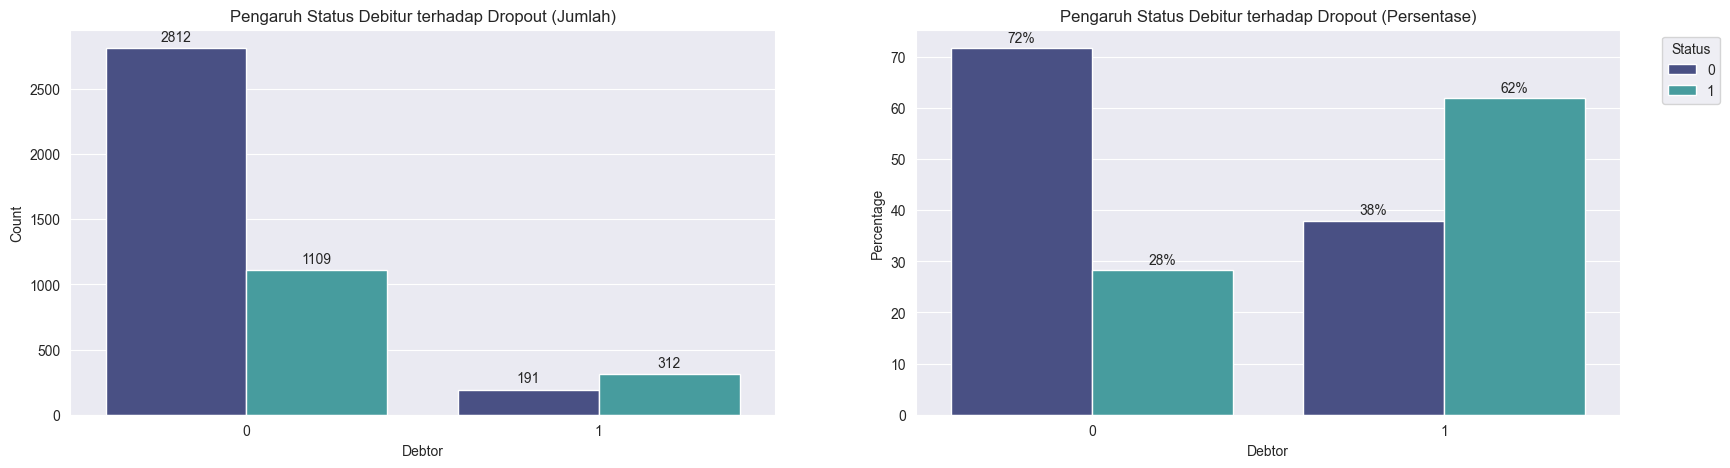

In [55]:
debtor_tuition = df.groupby(['Debtor', 'Target']).agg(
    Count=('Target', 'size')).reset_index()
debtor_tuition['Percentage'] = (debtor_tuition['Count'] / debtor_tuition.groupby('Debtor')['Count'].transform('sum')) * 100

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

bar1 = sns.barplot(ax=axes[0], x='Debtor', y='Count', data=debtor_tuition, palette='mako', hue='Target', dodge=True, legend=False)
axes[0].set_title('Pengaruh Status Debitur terhadap Dropout (Jumlah)')
for container in bar1.containers:
    bar1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

bar2 = sns.barplot(ax=axes[1], x='Debtor', y='Percentage', data=debtor_tuition, palette='mako', hue='Target', dodge=True, legend=True)
axes[1].set_title('Pengaruh Status Debitur terhadap Dropout (Persentase)')
for container in bar2.containers:
    bar2.bar_label(container, fmt='%.0f%%', label_type='edge', fontsize=10, padding=2)

axes[1].legend(title='Status', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

plt.show()

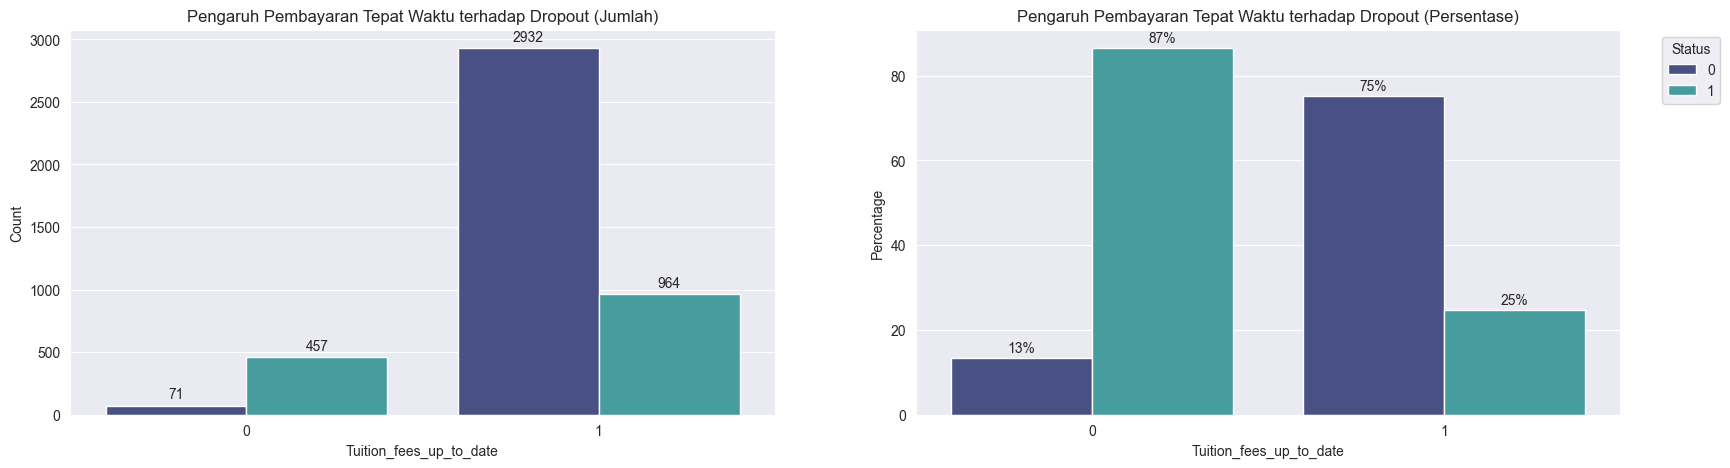

In [56]:
target_tuition = df.groupby(['Tuition_fees_up_to_date', 'Target']).agg(
    Count=('Target', 'count')).reset_index()
target_tuition['Percentage'] = (target_tuition['Count'] / target_tuition.groupby('Tuition_fees_up_to_date')['Count'].transform('sum')) * 100

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

bar1 = sns.barplot(ax=axes[0], x='Tuition_fees_up_to_date', y='Count', data=target_tuition, palette='mako', hue='Target', dodge=True, legend=False)
axes[0].set_title('Pengaruh Pembayaran Tepat Waktu terhadap Dropout (Jumlah)')
for container in bar1.containers:
    bar1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

bar2 = sns.barplot(ax=axes[1], x='Tuition_fees_up_to_date', y='Percentage', data=target_tuition, palette='mako', hue='Target', dodge=True, legend=True)
axes[1].set_title('Pengaruh Pembayaran Tepat Waktu terhadap Dropout (Persentase)')
for container in bar2.containers:
    bar2.bar_label(container, fmt='%.0f%%', label_type='edge', fontsize=10, padding=2)

axes[1].legend(title='Status', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

plt.show()

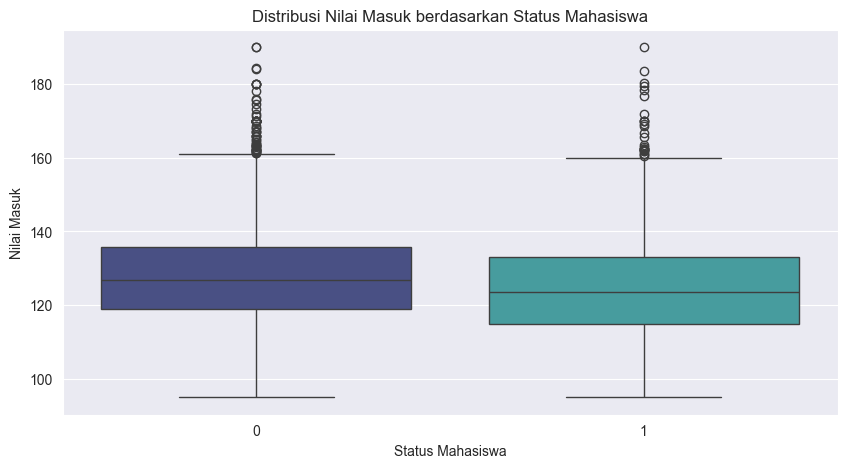

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Target', y='Admission_grade', data=df, palette='mako', hue='Target', legend=False)
plt.title('Distribusi Nilai Masuk berdasarkan Status Mahasiswa')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Nilai Masuk')
plt.show()

## Modeling

In [51]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=100000)
svm = SVC(max_iter=-1, kernel='rbf', random_state=42)
knn = KNeighborsClassifier() 
dt = DecisionTreeClassifier(random_state=42)  
nb = GaussianNB() 
gb = GradientBoostingClassifier(random_state=42)  

In [52]:
models = {
    'Random Forest': rf,
    'Logistic Regression': lr,
    'SVM': svm,
    'K-Nearest Neighbors': knn,
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'Gradient Boosting': gb
}

## Evaluation

In [53]:
def evaluate_models(X, y, models, scoring=None, cv=5):
    """
    Fungsi untuk mengevaluasi berbagai model dengan cross-validation.

    Parameters:
    X: array-like or DataFrame
        Fitur input (train data).
    y: array-like or Series
        Target output (train labels).
    models: dict, model-model yang akan dievaluasi.
    scoring: list of str, optional
        List skor metrik yang akan dihitung, seperti ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'].
    cv: int, default=5
        Jumlah fold untuk cross-validation.

    Returns:
    DataFrame: Tabel hasil cross-validation untuk setiap model.
    """

    if scoring is None:
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    results = []

    for model_name, model in models.items():
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

        avg_accuracy = cv_results['test_accuracy'].mean()
        avg_precision = cv_results['test_precision'].mean()
        avg_recall = cv_results['test_recall'].mean()
        avg_f1 = cv_results['test_f1'].mean()
        avg_auc = cv_results['test_roc_auc'].mean()

        results.append({
            'Model': model_name,
            'Avg_Accuracy': avg_accuracy,
            'Avg_Precision': avg_precision,
            'Avg_Recall': avg_recall,
            'Avg_F1 Score': avg_f1,
            'Avg_AUC': avg_auc
        })

    results_df = pd.DataFrame(results)

    return results_df

In [54]:
def highlight_max(dataframe):
    return dataframe.highlight_max(
        subset=['Avg_Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1 Score', 'Avg_AUC'],
        color='lightgreen',
        axis=0
    )

In [55]:
normal_result = evaluate_models(X_train_scaled, y_train, models=models)
normal_result

,Model,Avg_Accuracy,Avg_Precision,Avg_Recall,Avg_F1 Score,Avg_AUC
0,Random Forest,0.877652,0.867577,0.719457,0.786056,0.914319
1,Logistic Regression,0.880192,0.871444,0.723982,0.790651,0.917031
2,SVM,0.870870,0.903679,0.657014,0.760462,0.908586
3,K-Nearest Neighbors,0.844308,0.853762,0.605430,0.708300,0.845806
4,Decision Tree,0.813797,0.697030,0.715837,0.706093,0.787054
5,Naive Bayes,0.821412,0.713061,0.716742,0.714639,0.861207
6,Gradient Boosting,0.880476,0.862961,0.734842,0.793213,0.921140


In [56]:
smt_result = evaluate_models(X_smt, y_smt, models=models)
higlight_smt_result = highlight_max(smt_result.style)
higlight_smt_result

,Model,Avg_Accuracy,Avg_Precision,Avg_Recall,Avg_F1 Score,Avg_AUC
0,Random Forest,0.911686,0.926285,0.893623,0.908275,0.967732
1,Logistic Regression,0.857234,0.876016,0.832790,0.853710,0.923792
2,SVM,0.876957,0.894735,0.854570,0.874116,0.938893
3,K-Nearest Neighbors,0.850664,0.821679,0.895656,0.856947,0.927995
4,Decision Tree,0.845546,0.838102,0.854197,0.843578,0.845548
5,Naive Bayes,0.791900,0.836773,0.725143,0.776733,0.858159
6,Gradient Boosting,0.896072,0.914327,0.873079,0.891264,0.957437


In [57]:
cc_result = evaluate_models(X_cc, y_cc, models=models)
hightlight_cc_result = highlight_max(cc_result.style)
hightlight_cc_result

,Model,Avg_Accuracy,Avg_Precision,Avg_Recall,Avg_F1 Score,Avg_AUC
0,Random Forest,0.853394,0.864773,0.839819,0.851590,0.925517
1,Logistic Regression,0.843439,0.864722,0.816290,0.839444,0.911464
2,SVM,0.847964,0.859706,0.832579,0.845644,0.917958
3,K-Nearest Neighbors,0.794570,0.853988,0.712217,0.776229,0.869018
4,Decision Tree,0.778281,0.766995,0.800000,0.783047,0.778281
5,Naive Bayes,0.805430,0.822793,0.782805,0.800490,0.849311
6,Gradient Boosting,0.862896,0.873140,0.852489,0.861706,0.937299


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='recall',
    cv=5,  
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_smt, y_smt)

print("Best parameters found: ", random_search.best_params_)
print("Best recall score from CV: ", random_search.best_score_)

Best parameters found:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best recall score from CV:  0.8940341893342122


In [59]:
# Get the best model
best_rf = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=40)

tune_model = {
    'Random Forest Tuned': best_rf,
}
tune_result = evaluate_models(X_smt, y_smt, models=tune_model)
rf_result = smt_result[smt_result['Model'] == 'Random Forest']
percentage_increase = ((tune_result.drop(columns='Model') - rf_result.drop(columns='Model')) / rf_result.drop(columns='Model')) * 100
percentage_increase = percentage_increase.round(2).astype(str) + " %"

print("Persentase Peningkatan Setelah Tuning:\n")
print(percentage_increase.to_string(index=False))
tune_result

Persentase Peningkatan Setelah Tuning:

Avg_Accuracy Avg_Precision Avg_Recall Avg_F1 Score Avg_AUC
      0.32 %        0.34 %     0.28 %       0.32 %  0.08 %


,Model,Avg_Accuracy,Avg_Precision,Avg_Recall,Avg_F1 Score,Avg_AUC
0,Random Forest Tuned,0.914562,0.929476,0.896088,0.911179,0.968542


In [63]:
best_rf.fit(X_smt, y_smt)

joblib.dump(best_rf, 'model/model.pkl')

['model/model.pkl']

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

joblib.dump(scaler, "model/scaler.pkl")

['model/scaler.pkl']